In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [6]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis]

Load in the ions table for atomic data

In [7]:
z_sys = 1.234705 #1.234691

# HI

## HI 1215
Get HI 1215 from COS STIS

In [8]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [9]:
hi_1215_stis.grab_ion_transition_info()

In [10]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list, masks=[[100,200],[250,300]])

In [11]:
hi_1215_stis.cont_norm_flux(v_abs_range=[-65,60], degree=1)

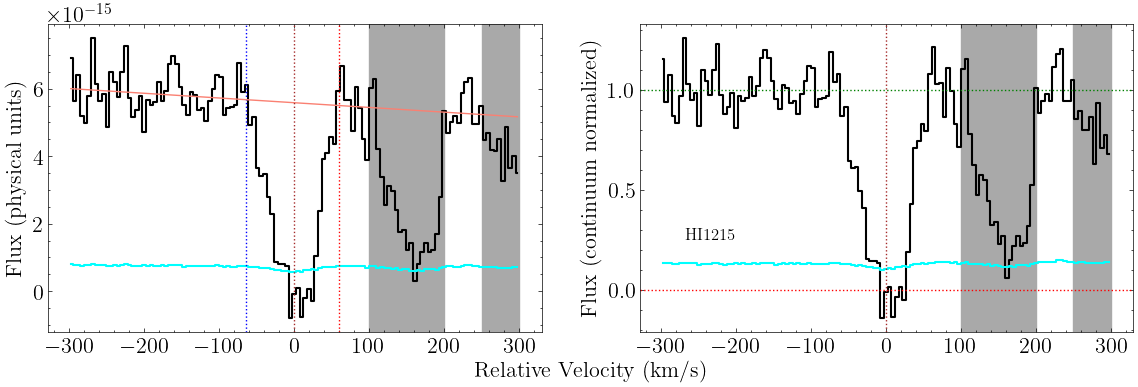

In [12]:
fig, ax = hi_1215_stis.plot_ion_transition_spec_cont()

In [13]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [14]:
hi_1215_stis.init_ion_transition(init_values = np.array([[14.5,20,0]]), lsf_convolve = True)

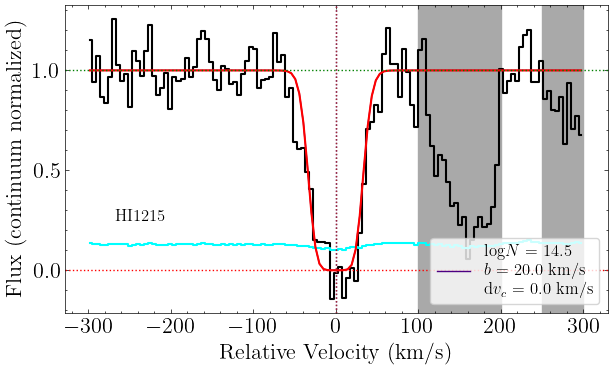

In [15]:
fig, ax = hi_1215_stis.plot_ion_transition_init_fit()

In [16]:
hi_1215_stis.fit_ion_transition()

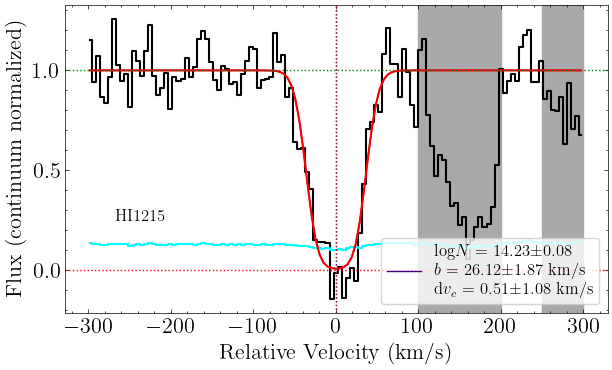

In [17]:
fig, ax = hi_1215_stis.plot_ion_transition_best_fit()

## HI 1025
Get HI 1025 from COS STIS

In [18]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [19]:
hi_1025_stis.grab_ion_transition_info()

In [20]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list, masks=[[120,220]])

In [21]:
hi_1025_stis.cont_norm_flux(v_abs_range=[-45,50], degree=1)

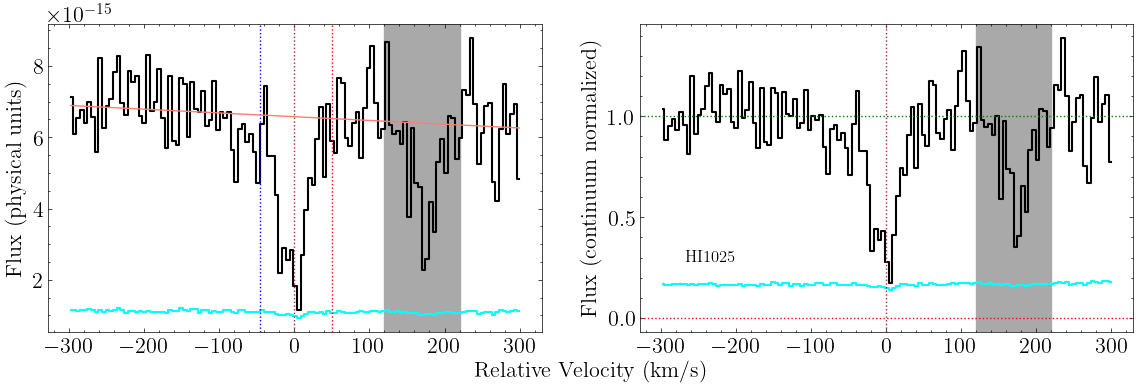

In [22]:
fig, ax = hi_1025_stis.plot_ion_transition_spec_cont()

In [23]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [24]:
hi_1025_stis.init_ion_transition(init_values = np.array([[14.5,20,0]]), lsf_convolve = True)

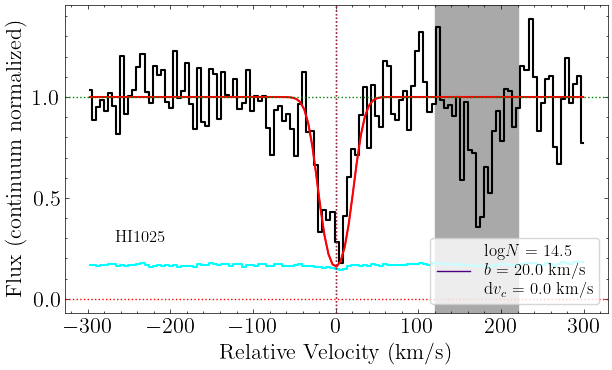

In [25]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit()

In [26]:
hi_1025_stis.fit_ion_transition()

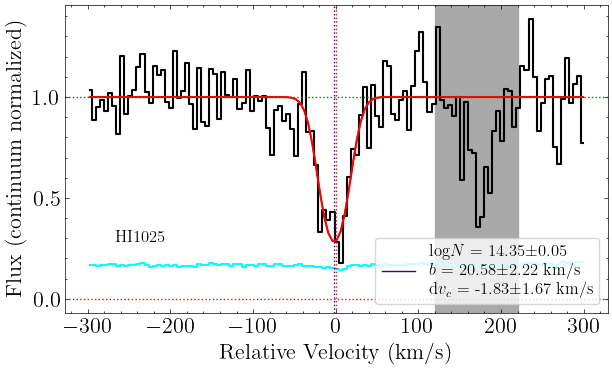

In [27]:
fig, ax = hi_1025_stis.plot_ion_transition_best_fit()

## HI ion
Now compile the HI ion

In [28]:
hi = ion(z_sys, 'HI', [hi_1215_stis, hi_1025_stis])

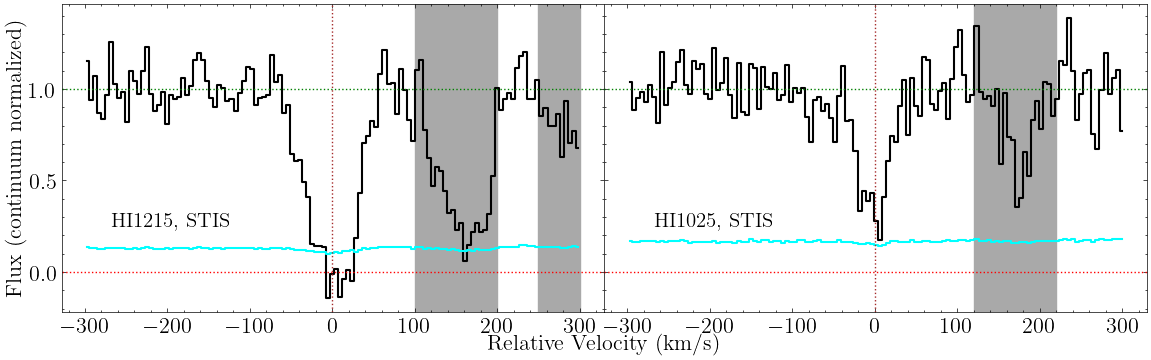

In [29]:
fig, axes = hi.plot_ion()

In [30]:
hi.init_ion([hi_1025_stis.best_values, hi_1025_stis.best_values])

#hi.init_ion(np.array([[ 14.95422061,  28.70649207, -23.0545877 ],
#       [ 15.10963423,  13.00015786,   5.3594146 ]]))

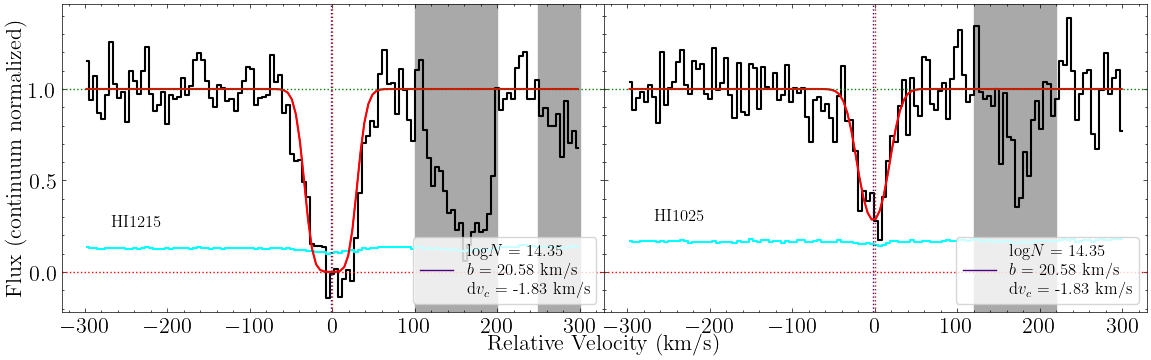

In [31]:
fig, axes = hi.plot_ion_init_fit()

In [32]:
hi.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                              ['it1c1_b', 'it2c1_b'],
                              ['it1c1_dv_c', 'it2c1_dv_c']])
            #lower_bounds_dict={'it1c1_logN':13.5,'it1c1_b':0,'it1c1_dv_c':-20},
          #upper_bounds_dict={'it1c1_logN':15.5,'it1c1_b':50,'it1c1_dv_c':20})

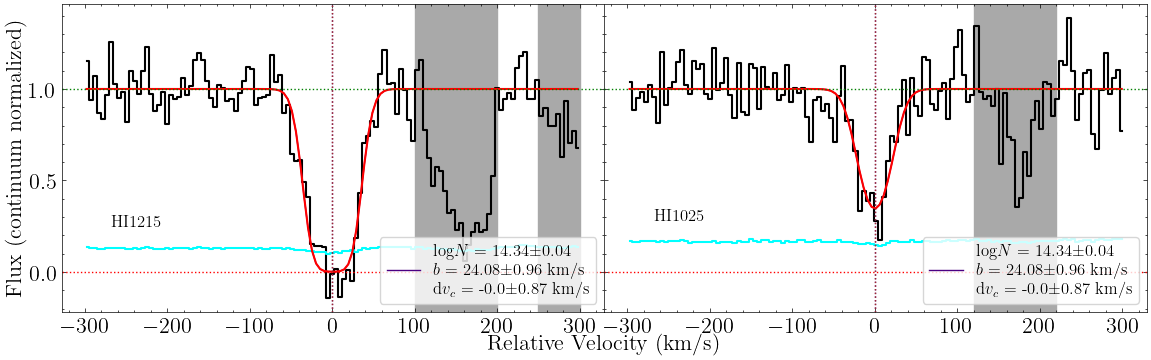

In [33]:
fig, axes = hi.plot_ion_best_fit()

In [34]:
hi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=200, n_steps=5000)
#hi.fit_ion_emcee(load=True, loaddir=rootdir)

100%|███████████████████████████████████████| 5000/5000 [03:52<00:00, 21.51it/s]


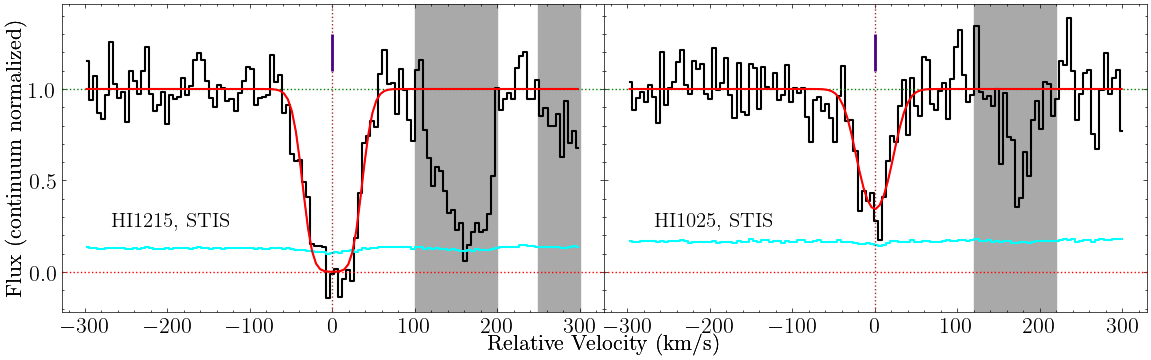

In [35]:
fig, axes = hi.plot_samples()

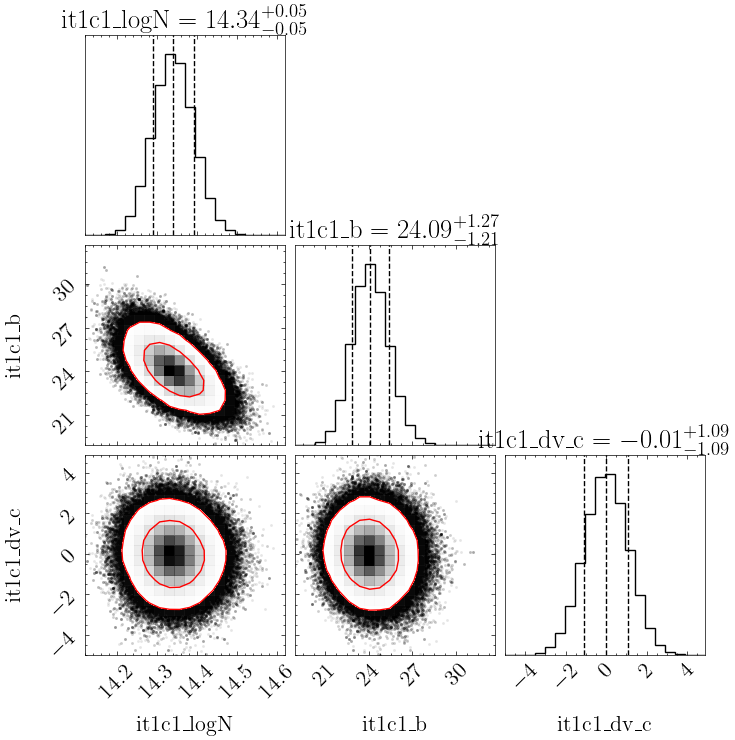

In [36]:
hi.plot_corner()